<a href="https://colab.research.google.com/github/dongzooo/Data-Analysis/blob/main/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D_ANN(Artificial_Neural_Network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns ## 차트 라이브러리

import matplotlib as mpl ## 차트 라이브러리
import matplotlib.pyplot as plt ## 차트 라이브러리

In [ ]:
# scikit-learn 
from sklearn.compose import ColumnTransformer
from sklearn.datasets import make_moons
from sklearn.impute import SimpleImputer ## Imputation (대체) transformer for completing missing values.
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.metrics import accuracy_score # 모델의 품질을 확인하는 라이브러리
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.svm import SVC

In [ ]:
# we set sep=', ' since this dataset is not a regular csv file
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None, sep=', ', engine='python')

df.columns = ['age', 'workclass', 'fnlwgt', 'education', 
              'education-num', 'marital-status', 'occupation', 
              'relationship', 'race', 'sex', 'capital-gain', 
              'capital-loss', 'hours-per-week', 'native-country', 
              'result']

display(df.head(15))

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


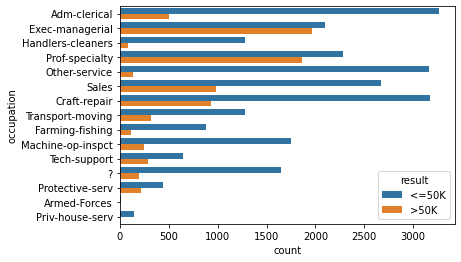

In [ ]:
sns.countplot(y="occupation", hue="result", data=df)

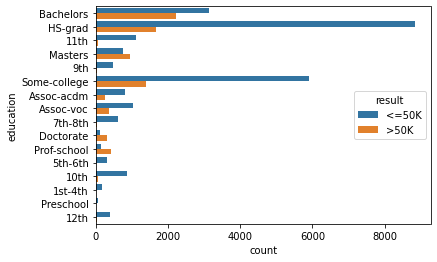

In [ ]:
sns.countplot(y="education", hue="result", data=df)

In [ ]:
len(df)

32561

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
gender = LabelEncoder()
gender.fit(df.sex)


LabelEncoder()

In [ ]:
print(gender.classes_)
print(gender.transform(['Female', 'Female', 'Male', 'Female', 'Male']))

['Female' 'Male']
[0 0 1 0 1]


In [ ]:
# encode label first
label_le = LabelEncoder()
df['result'] = label_le.fit_transform(df['result'].values)
# label class 가 ['<=50K', '>50K']

# encode categorical features
catego_features = ['workclass', 'education', 'marital-status', 'occupation', 
                   'relationship', 'race', 'sex', 'native-country']

catego_le = LabelEncoder()

# transform categorical values into numerical values
# be careful that '?' will also be encoded
# we have to replace it to NaN in numerical
categories = []
for i in catego_features:
    df[i] = catego_le.fit_transform(df[i].values)
    classes_list = catego_le.classes_.tolist()
    
    # replace '?' with 'NaN'
    if '?' in classes_list:
        idx = classes_list.index('?')
        df[i] = df[i].replace(idx, np.nan)
    
    # store the total number of values
    categories.append(np.arange(len(classes_list)))

display(df.head(15))

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,7.0,77516,9,13,4,1.0,1,4,1,2174,0,40,39.0,0
1,50,6.0,83311,9,13,2,4.0,0,4,1,0,0,13,39.0,0
2,38,4.0,215646,11,9,0,6.0,1,4,1,0,0,40,39.0,0
3,53,4.0,234721,1,7,2,6.0,0,2,1,0,0,40,39.0,0
4,28,4.0,338409,9,13,2,10.0,5,2,0,0,0,40,5.0,0
5,37,4.0,284582,12,14,2,4.0,5,4,0,0,0,40,39.0,0
6,49,4.0,160187,6,5,3,8.0,1,2,0,0,0,16,23.0,0
7,52,6.0,209642,11,9,2,4.0,0,4,1,0,0,45,39.0,1
8,31,4.0,45781,12,14,4,10.0,1,4,0,14084,0,50,39.0,1
9,42,4.0,159449,9,13,2,4.0,0,4,1,5178,0,40,39.0,1


In [ ]:
display(df.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
result               0
dtype: int64

In [ ]:
print(df.shape)

# drop rows with missing values
df_drop_row = df.dropna()
print(df_drop_row.shape)

(32561, 15)
(30162, 15)


In [ ]:
print('Original: {}'.format(df.shape))

# drop columns with missing values
df_drop_col = df.dropna(axis=1)
print('Drop column: {}'.format(df_drop_col.shape))

# drop rows or columns where all values are NaN
df_drop_row_all = df.dropna(how='all')
print('Drop row all: {}'.format(df_drop_row_all.shape))

# keep rows that have at least 14 non-NaN values
df_drop_row_thresh = df.dropna(thresh=14)
print('Drop row 14: {}'.format(df_drop_row_thresh.shape))

# only drop rows where NaN appear in specific columns (here: 'occupation')
df_drop_row_occupation = df.dropna(subset=['occupation'])
print('Drop row occupation: {}'.format(df_drop_row_occupation.shape))

Original: (32561, 15)
Drop column: (32561, 12)
Drop row all: (32561, 15)
Drop row 14: (30725, 15)
Drop row occupation: (30718, 15)


In [ ]:
imr = SimpleImputer(missing_values = np.NaN, strategy = 'most_frequent') # NaN : Not a Number
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)

df_impute = pd.DataFrame(imputed_data)
df_impute.columns = df.columns

display(df.head(15))
display(df_impute.head(15))

# check if there are still missing values
display(df_impute.isnull().sum())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,7.0,77516,9,13,4,1.0,1,4,1,2174,0,40,39.0,0
1,50,6.0,83311,9,13,2,4.0,0,4,1,0,0,13,39.0,0
2,38,4.0,215646,11,9,0,6.0,1,4,1,0,0,40,39.0,0
3,53,4.0,234721,1,7,2,6.0,0,2,1,0,0,40,39.0,0
4,28,4.0,338409,9,13,2,10.0,5,2,0,0,0,40,5.0,0
5,37,4.0,284582,12,14,2,4.0,5,4,0,0,0,40,39.0,0
6,49,4.0,160187,6,5,3,8.0,1,2,0,0,0,16,23.0,0
7,52,6.0,209642,11,9,2,4.0,0,4,1,0,0,45,39.0,1
8,31,4.0,45781,12,14,4,10.0,1,4,0,14084,0,50,39.0,1
9,42,4.0,159449,9,13,2,4.0,0,4,1,5178,0,40,39.0,1


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39.0,7.0,77516.0,9.0,13.0,4.0,1.0,1.0,4.0,1.0,2174.0,0.0,40.0,39.0,0.0
1,50.0,6.0,83311.0,9.0,13.0,2.0,4.0,0.0,4.0,1.0,0.0,0.0,13.0,39.0,0.0
2,38.0,4.0,215646.0,11.0,9.0,0.0,6.0,1.0,4.0,1.0,0.0,0.0,40.0,39.0,0.0
3,53.0,4.0,234721.0,1.0,7.0,2.0,6.0,0.0,2.0,1.0,0.0,0.0,40.0,39.0,0.0
4,28.0,4.0,338409.0,9.0,13.0,2.0,10.0,5.0,2.0,0.0,0.0,0.0,40.0,5.0,0.0
5,37.0,4.0,284582.0,12.0,14.0,2.0,4.0,5.0,4.0,0.0,0.0,0.0,40.0,39.0,0.0
6,49.0,4.0,160187.0,6.0,5.0,3.0,8.0,1.0,2.0,0.0,0.0,0.0,16.0,23.0,0.0
7,52.0,6.0,209642.0,11.0,9.0,2.0,4.0,0.0,4.0,1.0,0.0,0.0,45.0,39.0,1.0
8,31.0,4.0,45781.0,12.0,14.0,4.0,10.0,1.0,4.0,0.0,14084.0,0.0,50.0,39.0,1.0
9,42.0,4.0,159449.0,9.0,13.0,2.0,4.0,0.0,4.0,1.0,5178.0,0.0,40.0,39.0,1.0


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
result            0
dtype: int64

In [ ]:
df_impute.shape

(32561, 15)

In [ ]:
# we perform one-hot encoding on both impute data and drop-row data
impute_data = df_impute.values
drop_row_data = df_drop_row.values

# find the index of the categorical feature
catego_features_idx = []
for fea in catego_features:
    
    catego_features_idx.append(df.columns.tolist().index(fea))

# give the column index you want to do one-hot encoding
ohe = ColumnTransformer(
    [
        ("one_hot_encoder", OneHotEncoder(sparse = False, categories = "auto"), catego_features_idx)
    ],
    remainder = "passthrough"
)

impute_onehot_data = ohe.fit_transform(impute_data)
print('Impute: {}'.format(impute_data.shape))
print('Impute one-hot: {}'.format(impute_onehot_data.shape))

drop_row_onehot_data = ohe.fit_transform(drop_row_data)
print('Drop row: {}'.format(drop_row_data.shape))
print('Drop row one-hot: {}'.format(drop_row_onehot_data.shape))

Impute: (32561, 15)
Impute one-hot: (32561, 106)
Drop row: (30162, 15)
Drop row one-hot: (30162, 105)


In [ ]:
df_dummy = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                 header=None, sep=', ', engine='python')

df_dummy.columns = ['age', 'workclass', 'fnlwgt', 'education', 
                    'education-num', 'marital-status', 'occupation', 
                    'relationship', 'race', 'sex', 'capital-gain', 
                    'capital-loss', 'hours-per-week', 'native-country', 
                    'result']

# encode label first
label_le = LabelEncoder()
df_dummy['result'] = label_le.fit_transform(df_dummy['result'].values)

# remove rows with missing data
df_dummy = df_dummy.replace('?', np.nan)
df_dummy_drop_row = df_dummy.dropna()
# here we cannot use sklearn.Imputer, since it only accepts numerical values

# one-hot encoding
df_dummy_drop_row = pd.get_dummies(df_dummy_drop_row)
display(df_dummy_drop_row.head())

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,result,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,...,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_small = df.sample(n = 4000, random_state = 0)

X = df_small.drop('result', axis=1).values
y = df_small['result'].values

In [ ]:
X

array([[2.70000e+01, 4.00000e+00, 1.77119e+05, ..., 0.00000e+00,
        4.40000e+01, 3.90000e+01],
       [2.70000e+01, 4.00000e+00, 2.16481e+05, ..., 0.00000e+00,
        4.00000e+01, 3.90000e+01],
       [2.50000e+01, 4.00000e+00, 2.56263e+05, ..., 0.00000e+00,
        4.00000e+01, 3.90000e+01],
       ...,
       [2.80000e+01, 4.00000e+00, 4.99001e+05, ..., 0.00000e+00,
        4.00000e+01, 2.60000e+01],
       [2.80000e+01, 4.00000e+00, 1.85957e+05, ..., 0.00000e+00,
        4.00000e+01, 3.90000e+01],
       [2.40000e+01, 4.00000e+00, 1.75183e+05, ..., 0.00000e+00,
        4.00000e+01, 3.90000e+01]])

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [ ]:
X_train, X_test, y_train, y_test

(array([[2.70000e+01, 4.00000e+00, 1.02889e+05, ..., 0.00000e+00,
         4.00000e+01, 3.90000e+01],
        [5.80000e+01, 4.00000e+00, 1.16901e+05, ..., 0.00000e+00,
         2.50000e+01, 3.90000e+01],
        [2.90000e+01, 4.00000e+00, 2.21977e+05, ..., 0.00000e+00,
         4.00000e+01, 3.90000e+01],
        ...,
        [4.20000e+01, 6.00000e+00, 1.40474e+05, ..., 0.00000e+00,
         3.50000e+01, 3.90000e+01],
        [2.30000e+01, 6.00000e+00, 1.91283e+05, ..., 0.00000e+00,
         4.00000e+01, 3.90000e+01],
        [2.50000e+01, 4.00000e+00, 3.74163e+05, ..., 0.00000e+00,
         6.00000e+01, 2.60000e+01]]),
 array([[1.80000e+01, 4.00000e+00, 3.35665e+05, ..., 0.00000e+00,
         2.40000e+01, 3.90000e+01],
        [4.20000e+01, 4.00000e+00, 2.08875e+05, ..., 0.00000e+00,
         4.00000e+01, 8.00000e+00],
        [6.90000e+01,         nan, 1.07575e+05, ..., 0.00000e+00,
         3.50000e+01, 3.90000e+01],
        ...,
        [2.50000e+01, 4.00000e+00, 2.12495e+05, ..., 1

In [ ]:

ohe = ColumnTransformer(
    [
        ('ohe', OneHotEncoder(categories = categories, sparse = False), catego_features_idx),
    ],
    remainder = "passthrough"
)

In [ ]:

# define pipeline with an arbitrary number of transformer in a tuple array
pipe_knn = Pipeline([
    ("imr", SimpleImputer(missing_values = np.NaN, strategy = 'most_frequent')),
    ("ohe", ohe),
    ("scl", StandardScaler()),
    ("clf", KNeighborsClassifier(n_neighbors = 10, p = 2, metric = "minkowski"))
])

pipe_svm = Pipeline([
    ("imr", SimpleImputer(missing_values = np.NaN, strategy = 'most_frequent')),
    ("ohe", ohe),
    ("scl", StandardScaler()),
    ('clf', SVC(kernel = "rbf", random_state = 0, gamma = 0.001, C = 100.0))
])


In [ ]:

# use the pipeline model to train
pipe_knn.fit(X_train, y_train)
y_pred = pipe_knn.predict(X_test)
print('[KNN]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

pipe_svm.fit(X_train, y_train)
y_pred = pipe_svm.predict(X_test)
print('\n[SVC]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

[KNN]
Misclassified samples: 158
Accuracy: 0.8025

[SVC]
Misclassified samples: 134
Accuracy: 0.8325


In [ ]:
pipe_knn = Pipeline([
    ('imr', SimpleImputer(missing_values = np.NaN, strategy = 'most_frequent')),
    ('scl', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=10, p=2, metric='minkowski'))
])

pipe_svm = Pipeline([
    ('imr', SimpleImputer(missing_values = np.NaN, strategy = 'most_frequent')),
    ('scl', StandardScaler()),
    ('clf', SVC(kernel='rbf', random_state=0, gamma=0.001, C=100.0))
])

pipe_knn.fit(X_train, y_train)
y_pred = pipe_knn.predict(X_test)
print('[KNN: no one-hot]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

pipe_svm.fit(X_train, y_train)
y_pred = pipe_svm.predict(X_test)
print('\n[SVC: no one-hot]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

[KNN: no one-hot]
Misclassified samples: 156
Accuracy: 0.8050

[SVC: no one-hot]
Misclassified samples: 151
Accuracy: 0.8113
